## <font color='green'>Problem Statement</font>
## <font color='green'>Forcasting of Gold Price for next 30 days.</font>

## Business Objectives:-
Data provided is related to gold prices. The objective is to understand the underlying structure in your dataset and come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days.
This forecast model will be used by gold exporting and gold importing companies to understand the metal price movements and accordingly set their revenue expectations.

# Introduction:-
### What is Forcasting a Time Series?
Time series forecasting is one of the most applied data science techniques in business, finance, supply chain management, production and inventory planning. Many prediction problems involve a time component and thus require extrapolation of time series data, or time series forecasting. Time series forecasting is also an important area of machine learning (ML) and can be cast as a supervised learning problem. ML methods such as Regression, Neural Networks, Support Vector Machines, Random Forests and XGBoost — can be applied to it. Forecasting involves taking models fit on historical data and using them to predict future observations.

Time series forecasting means to forecast or to predict the future value over a period of time. It entails developing models based on previous data and applying them to make observations and guide future strategic decisions.

The future is forecast or estimated based on what has already happened. Time series adds a time order dependence between observations. This dependence is both a constraint and a structure that provides a source of additional information. Before we discuss time series forecasting methods, let’s define time series forecasting more closely.

Time series forecasting is a technique for the prediction of events through a sequence of time. It predicts future events by analyzing the trends of the past, on the assumption that future trends will hold similar to historical trends. It is used across many fields of study in various applications including:

<font color='green'>Astronomy</font> , 
<font color='green'>Business planning</font> , 
<font color='green'>Control engineering</font> , 
<font color='green'>Earthquake prediction</font> , 
<font color='green'>Econometrics</font> , 
<font color='green'>Mathematical finance</font> , 
<font color='green'>Pattern recognition</font> , 
<font color='green'>Resources allocation</font> , 
<font color='green'>Signal processing</font> , 
<font color='green'>Statistics</font> , 
<font color='green'>Weather forecasting</font> , 
Time series forecasting starts with a historical time series. Analysts examine the historical data and check for patterns of time decomposition, such as trends, seasonal patterns, cyclic patterns and regularity. Many areas within organizations including marketing, finance and sales use some form of time series forecasting to evaluate probable technical costs and consumer demand. Models for time series data can have many forms and represent different stochastic processes.

### <font color='green'>Importing the Necessary Libraries:-</font>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <font color='green'>Importing the data:-</font>

In [26]:
data=pd.read_csv("C:/Users/HARSHAL/Downloads/Gold_data.csv",parse_dates=["date"],index_col='date')

In [27]:
data.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [28]:
data.tail()

,price
date,
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5
2021-12-20,4354.1
2021-12-21,4346.5


In [29]:
data.columns

Index(['price'], dtype='object')

In [30]:
data.shape

(2182, 1)

In [31]:
data.dtypes

price    float64
dtype: object

### <font color='green'>Descriptive Analysis on the basis of data</font>

In [32]:
data.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


### Box Plot

In [33]:
data.boxplot(column=['price'])

<AxesSubplot:>

### <font color='green'>Data Exploration:-</font>
Data exploration is basically done to check the null values(missing values) in any of the columns. 

In [34]:
data.isna().sum()

price    0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [36]:
data.duplicated()

date
2016-01-01    False
2016-01-02    False
2016-01-03    False
2016-01-04    False
2016-01-05    False
              ...  
2021-12-17    False
2021-12-18    False
2021-12-19     True
2021-12-20    False
2021-12-21    False
Length: 2182, dtype: bool

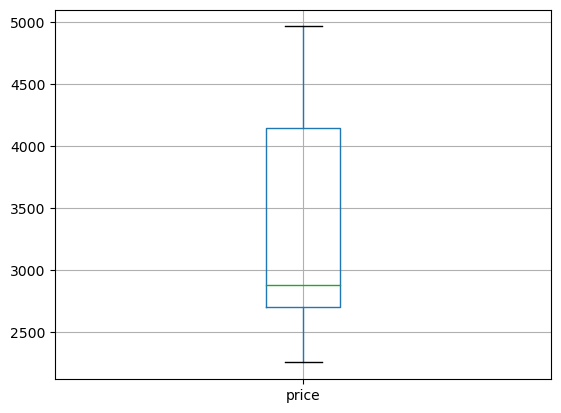

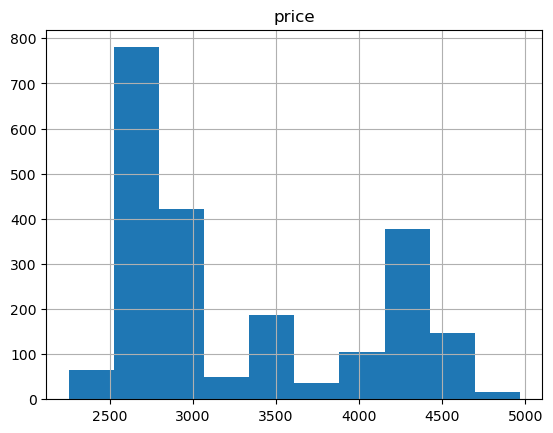

In [37]:
data.hist()
plt.show()

### Line Plot

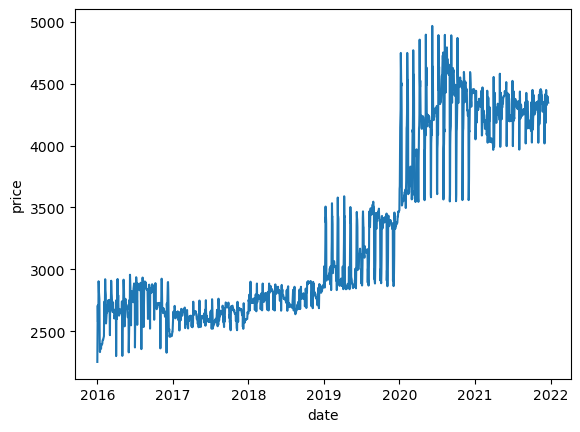

In [38]:
sns.lineplot(data=data,x=data.index,y=data.price)
plt.show()

 We have no missing data so we have all the entries for use.
 

### Scatter Plot

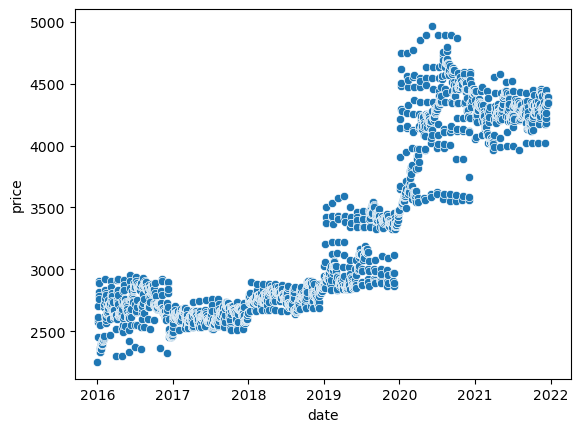

In [39]:
sns.scatterplot(data=data, x="date", y="price")
plt.show()

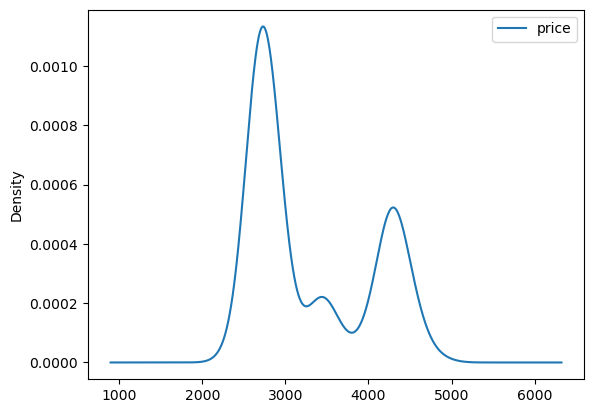

In [40]:
data.plot(kind='kde')
plt.show()

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

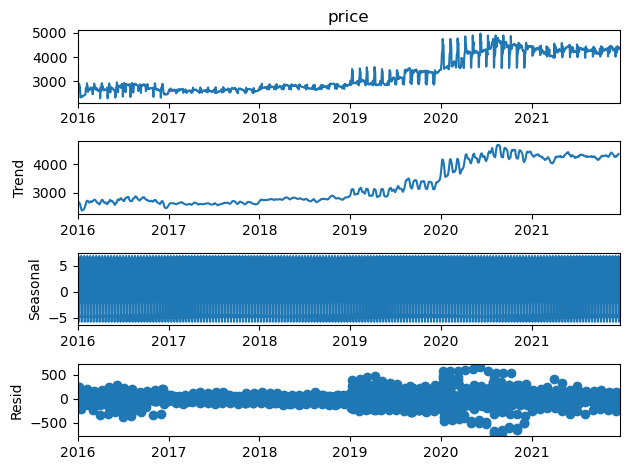

In [42]:
decompose=seasonal_decompose(data.price,period=12)
decompose.plot()
plt.show()

In [43]:
data.drop_duplicates(inplace=True)

In [44]:
data

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-16,4399.80
2021-12-17,4394.40
2021-12-18,4389.50


In [45]:
data.shape

(1876, 1)

### Resampling

In [46]:
new=data.resample('m').mean()
new

,price
date,
2016-01-31,2495.832258
2016-02-29,2688.703448
2016-03-31,2682.854839
2016-04-30,2684.314286
2016-05-31,2677.650000
...,...
2021-08-31,4263.014815
2021-09-30,4208.151852
2021-10-31,4287.908000


### Seasonal Decompose

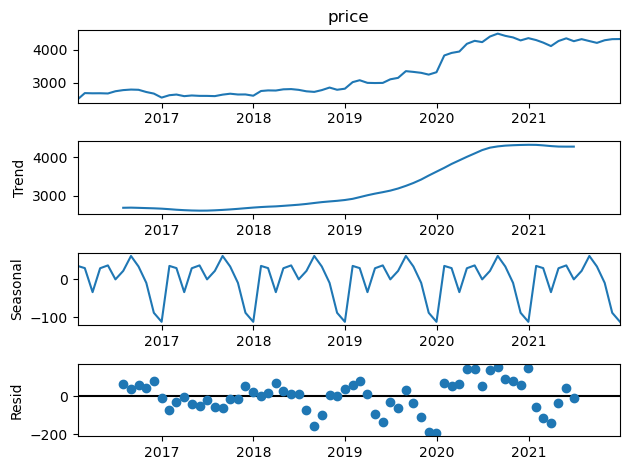

In [47]:
decompose=seasonal_decompose(new.price,period=12)
decompose.plot()
plt.show()

### AD Fuller Test

In [48]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [49]:
adf_test(new['price'])

Fail to reject the null hypothesis
Data is non-stationary


## ACF and PACF:-

### <font color='green'>Autocorrelation Function (ACF):-</font>
The autocorrelation function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other. The ACF plots the correlation coefficient against the lag, which is measured in terms of a number of periods or units. A lag corresponds to a certain point in time after which we observe the first value in the time series.

The correlation coefficient can range from -1 (a perfect negative relationship) to +1 (a perfect positive relationship). A coefficient of 0 means that there is no relationship between the variables. Also, most often, it is measured either by Pearson’s correlation coefficient or by Spearman’s rank correlation coefficient.

It’s most often used to analyze sequences of numbers from random processes, such as economic or scientific measurements. It can also be used to detect systematic patterns in correlated data sets such as securities prices or climate measurements. Usually, we can calculate the ACF using statistical packages from Python and R or using software such as Excel and SPSS. Below, we can see an example of the ACF plot:

In [50]:
import statsmodels.graphics.tsaplots as sgt
from matplotlib import pyplot as plt

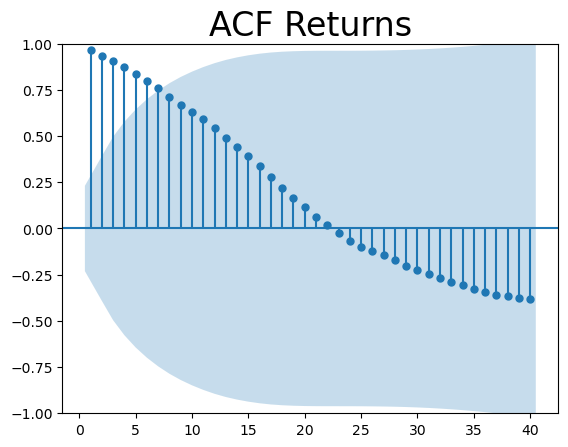

In [51]:
sgt.plot_acf(new.price, lags=40, zero = False)
plt.title("ACF Returns", size=24)
plt.show()

### <font color='green'>Partial Autocorrelation Function (PACF):-</font>
Partial autocorrelation is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables. For example, if we’re regressing a signal S at lag t (S_{t}) with the same signal at lags t-1, t-2 and t-3 (S_{t-1}, S_{t-2}, S_{t-3}), the partial correlation between S_{t} and S_{t-3} is the amount of correlation between S_{t} and S_{t-3} that isn’t explained by their mutual correlations with S_{t-1} and S_{t-2}.

That being said, the way of finding PACF between S_{t} and S_{t-3} is to use regression model

(1)
𝑆𝑡=𝜙1𝑆𝑡−1+𝜙2𝑆𝑡−2+𝜙3𝑆𝑡−3+𝜖
 
where \phi_{1}, \phi_{2} and \phi_{3} are coefficients and \epsilon is error. From the regression formula above, the PACF value between S_{t} and S_{t-3} is the coefficient \pi_{3}. This coefficient will give us direct effect of time-series S_{t-3} to the time-series S_{t} because the effects of S_{t-2} and S_{t-1} are already captured by \phi_{1} and \phi_{2}.

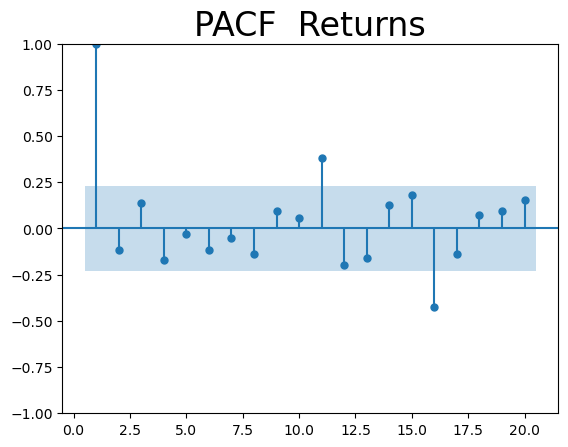

In [52]:
sgt.plot_pacf(new.price, lags = 20, zero = False, method = ('ols'))
plt.title("PACF  Returns", size=24)
plt.show()

# Model Building

### Trian Test Split

In [53]:
train = new.iloc[0:71,:]
test = new.iloc[71,:]

In [54]:
train_original = train.copy()
test_original = test.copy()

In [55]:
train1 = train.copy()

### Model 1 - Simple Expo Smoothing

In [56]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha = 0.15

In [57]:
model_ses12=SimpleExpSmoothing(train['price'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

date
2016-01-31    2495.832258
2016-02-29    2495.832258
2016-03-31    2524.762937
2016-04-30    2548.476722
2016-05-31    2568.852356
                 ...     
2021-07-31    4210.040745
2021-08-31    4226.745258
2021-09-30    4232.185692
2021-10-31    4228.580616
2021-11-30    4237.479723
Freq: M, Length: 71, dtype: float64

In [58]:
train['SES12'] = fitted_model.fittedvalues.shift(-1)

### Model 2 - Double Exponential

In [59]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(train['price'], trend='add')
fitted_DESadd12 = mod_add12.fit()
train['DESadd12'] = fitted_DESadd12.fittedvalues.shift(-1)

In [60]:
fitted_DESmul12 = ExponentialSmoothing(train['price'], trend='mul').fit()
train['DESmul12'] = fitted_DESmul12.fittedvalues.shift(-1)

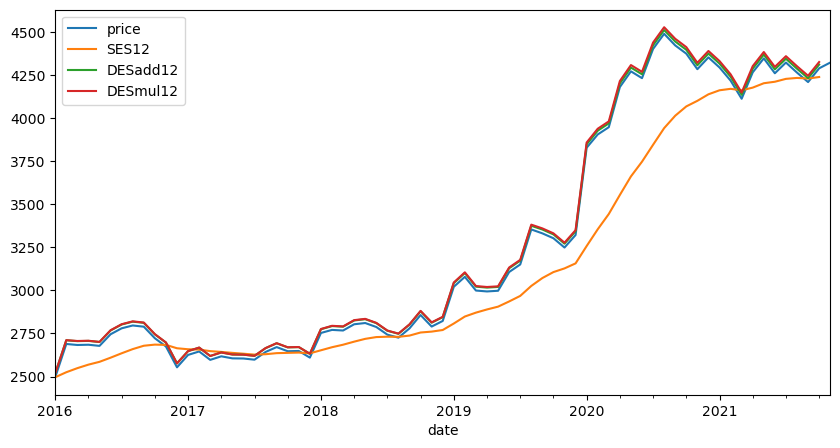

In [61]:
train[['price','SES12','DESadd12','DESmul12']].plot(figsize=(10,5))
plt.show();

### Model 3 - Triple Expo Smoothing

In [62]:
fitted_TESadd12 = ExponentialSmoothing(train['price'],trend='add',seasonal='add',seasonal_periods=12).fit()
train['TESadd12'] = fitted_TESadd12.fittedvalues

In [63]:
fitted_TESmul12 = ExponentialSmoothing(train['price'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
train['TESmul12'] = fitted_TESmul12.fittedvalues

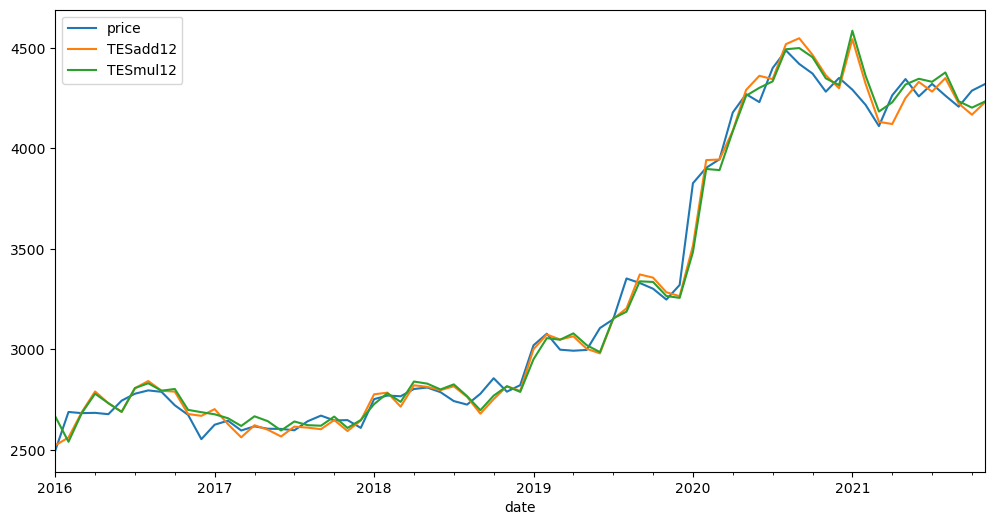

In [64]:
train[['price','TESadd12','TESmul12']].plot(figsize=(12,6))
plt.show();

### Model 4 - Holts Method

In [65]:
from statsmodels.tsa.holtwinters import Holt
hw_model = Holt(train["price"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
train['hw'] = hw_model.fittedvalues.shift(-1)

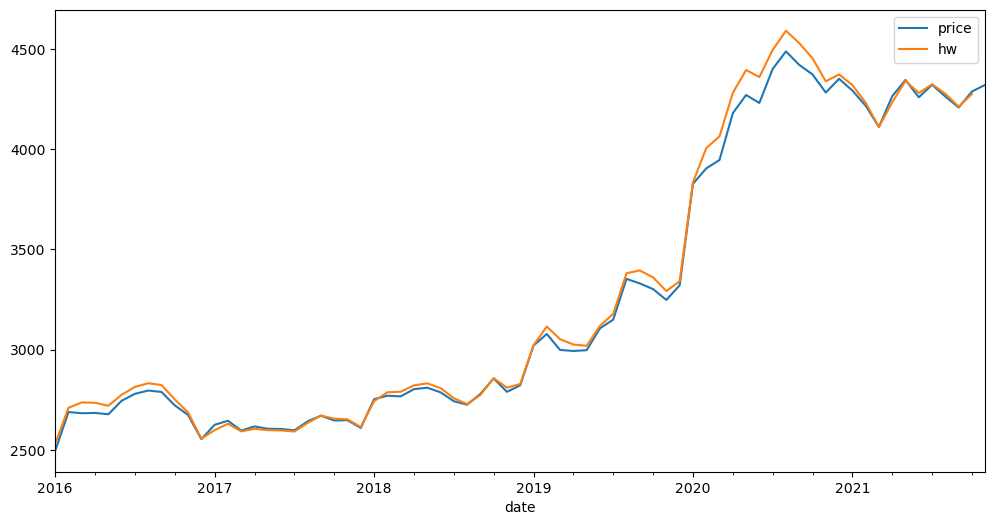

In [66]:
train[['price','hw']].plot(figsize=(12,6))
plt.show();

### <font color='darkblue'>Observation
It captures the trend, which we can see that the forecasted values are higher level than the test level.
    
It also captures the seasonality.
    
The peak of the forecasted value is higher than the actual.</font>

### Model Evaluation

In [67]:
def mape(actual,pred):
    return round((np.mean(abs(actual-pred)/actual))*100,2)

###### RMSE DESadd

In [68]:
# Test
test_pred1 = fitted_DESadd12.forecast(1)

In [69]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [70]:
rmse_DESadd_test = np.sqrt(mean_squared_error(test,test_pred1))
mape_DESadd_test = mape(test.values, test_pred1.values)

In [71]:
# Train
train_pred1 = fitted_DESadd12.predict(0)
rmse_DESadd_train = np.sqrt(mean_squared_error(train_original, train_pred1))
mape_DESadd_train = mape(train_original.values, train_pred1.values)

###### RMSE DESmul

In [72]:
# Test
test_pred2 = fitted_DESmul12.forecast(1)

In [73]:
rmse_DESmul_test = np.sqrt(mean_squared_error(test,test_pred2))
mape_DESmul_test = mape(test.values, test_pred2.values)

In [74]:
# Train
train_pred2 = fitted_DESmul12.predict(0)
rmse_DESmul_train = np.sqrt(mean_squared_error(train_original, train_pred2))
mape_DESmul_train = mape(train_original.values, train_pred2.values)

###### RMSE TESadd

In [75]:
#Test
test_pred3 = fitted_TESadd12.forecast(1)

In [76]:
rmse_TESadd_test = np.sqrt(mean_squared_error(test,test_pred3 ))
mape_TESadd_test = mape(test.values, test_pred3.values)

In [77]:
#Train
pred3_train = fitted_TESadd12.predict(0)

In [78]:
rmse3_train = np.sqrt(mean_squared_error(train_original,pred3_train))
mape_TESadd_train = mape(train_original.values, pred3_train.values)

###### RMSE TESmul

In [79]:
# Test
test_pred4 = fitted_TESmul12.forecast(1)

In [80]:
rmse4 = np.sqrt(mean_squared_error(test,test_pred4 ))
mape_TESmul_test = mape(test.values, test_pred4.values)

In [81]:
# Train
pred_train_TESmul12 = fitted_TESmul12.predict(0)

In [82]:
rmse4_train = np.sqrt(mean_squared_error(train_original,pred_train_TESmul12 ))
mape_TESmul_train = mape(train_original.values, pred_train_TESmul12.values)

###### RMSE Holts

In [83]:
# Test
test_pred5 = hw_model.forecast(1)

In [84]:
rmse5 = np.sqrt(mean_squared_error(test,test_pred5 ))
mape_holt_test = mape(test.values, test_pred5.values)

In [85]:
# Train
pred_train_hw = hw_model.predict(0)

In [86]:
rmse5_train_hw = np.sqrt(mean_squared_error(train_original, pred_train_hw ))
mape_holt_train = mape(train_original.values, pred_train_hw.values)

In [87]:
results_df = pd.DataFrame({'Test RMSE': [rmse_DESadd_test]}, index=['DESadd'])
r1 = pd.DataFrame({'Test RMSE': [rmse_DESmul_test]},index=['DESmul'])
r2 = pd.DataFrame({'Test RMSE': [rmse_TESadd_test]},index=['TESadd'])
r3 = pd.DataFrame({'Test RMSE': [rmse4]},index=['TESmul'])
r4 = pd.DataFrame({'Test RMSE': [rmse5]},index=['Holts'])
results_df = pd.concat([results_df,r1,r2,r3,r4])
results_df

,Test RMSE
DESadd,18.928162
DESmul,33.851372
TESadd,2.154280
TESmul,7.023715
Holts,2.435487


In [88]:
results_df2 = pd.DataFrame({'Train RMSE': [rmse_DESadd_train]}, index=['DESadd'])
t2 = pd.DataFrame({'Train RMSE': [rmse_DESmul_train]}, index=['DESmul'])
t3 = pd.DataFrame({'Train RMSE': [rmse3_train]}, index=['TESadd'])
t4 = pd.DataFrame({'Train RMSE': [rmse4_train]}, index=['TESmul'])
t5 = pd.DataFrame({'Train RMSE': [rmse5_train_hw]}, index=['Holts'])
results_df2 = pd.concat([results_df2,t2,t3,t4,t5])
results_df2

,Train RMSE
DESadd,96.211070
DESmul,96.428203
TESadd,81.016170
TESmul,84.658525
Holts,100.038697


In [89]:
result_rmse = pd.concat([results_df,results_df2])

### RMSE

In [90]:
result_rmse

,Test RMSE,Train RMSE
DESadd,18.928162,NaN
DESmul,33.851372,NaN
TESadd,2.154280,NaN
TESmul,7.023715,NaN
Holts,2.435487,NaN
DESadd,NaN,96.211070
DESmul,NaN,96.428203
TESadd,NaN,81.016170
TESmul,NaN,84.658525
Holts,NaN,100.038697


### MAPE

In [91]:
results_df3 = pd.DataFrame({'Test MAPE %': [mape_DESadd_test]}, index=['DESadd'])
rr1 = pd.DataFrame({'Test MAPE %': [mape_DESmul_test]},index=['DESmul'])
rr2 = pd.DataFrame({'Test MAPE %': [mape_TESadd_test]},index=['TESadd'])
rr3 = pd.DataFrame({'Test MAPE %': [mape_TESmul_test]},index=['TESmul'])
rr4 = pd.DataFrame({'Test MAPE %': [mape_holt_test]},index=['Holts'])
results_df3 = pd.concat([results_df3,rr1,rr2,rr3,rr4])
results_df3

,Test MAPE %
DESadd,0.44
DESmul,0.78
TESadd,0.05
TESmul,0.16
Holts,0.06


In [92]:
results_df4 = pd.DataFrame({'Train MAPE %': [mape_DESadd_train]}, index=['DESadd'])
tt2 = pd.DataFrame({'Train MAPE %': [mape_DESmul_train]}, index=['DESmul'])
tt3 = pd.DataFrame({'Train MAPE %': [mape_TESadd_train]}, index=['TESadd'])
tt4 = pd.DataFrame({'Train MAPE %': [mape_TESmul_train]}, index=['TESmul'])
tt5 = pd.DataFrame({'Train MAPE %': [mape_holt_train]}, index=['Holts'])
results_df4 = pd.concat([results_df4,tt2,tt3,tt4,tt5])
results_df4

,Train MAPE %
DESadd,22.62
DESmul,22.75
TESadd,22.95
TESmul,22.83
Holts,23.01


In [93]:
result_mape = pd.concat([results_df3,results_df4])

In [94]:
result_mape

,Test MAPE %,Train MAPE %
DESadd,0.44,NaN
DESmul,0.78,NaN
TESadd,0.05,NaN
TESmul,0.16,NaN
Holts,0.06,NaN
DESadd,NaN,22.62
DESmul,NaN,22.75
TESadd,NaN,22.95
TESmul,NaN,22.83
Holts,NaN,23.01


# Auto Regression Models

In [95]:
adf_test(train['price'])

Fail to reject the null hypothesis
Data is non-stationary


In [96]:
# First order differencing (I = 1)
from statsmodels.tsa.statespace.tools import diff
df = diff(train['price'],k_diff=1)
adf_test(df)

Reject the null hypothesis
Data is stationary


## ARMA Model

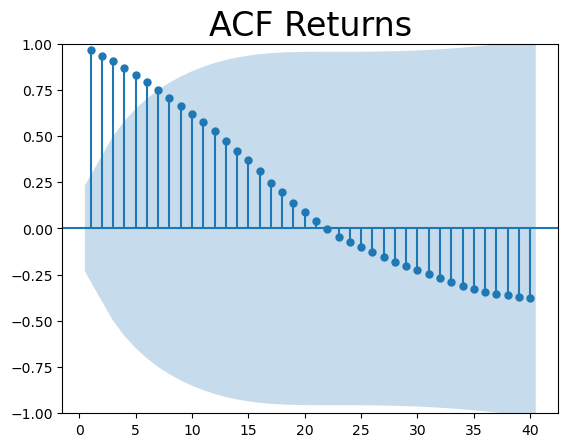

In [97]:
sgt.plot_acf(train.price, lags=40, zero = False)
plt.title("ACF Returns", size=24)
plt.show()

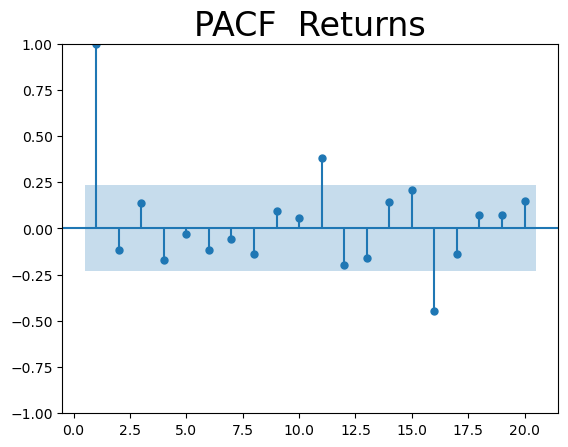

In [98]:
sgt.plot_pacf(train.price, lags = 20, zero = False, method = ('ols'))
plt.title("PACF  Returns", size=24)
plt.show()

In [99]:
from statsmodels.tsa.arima.model import ARIMA

In [100]:
# P =1, q = 5
model_ar_1_ma_5 = ARIMA(df, order=(1,0,5))
results_ar_1_ma_5 = model_ar_1_ma_5.fit()
results_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   70
Model:                 ARIMA(1, 0, 5)   Log Likelihood                -413.299
Date:                Wed, 01 Feb 2023   AIC                            842.598
Time:                        20:41:03   BIC                            860.586
Sample:                    02-29-2016   HQIC                           849.743
                         - 11-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.0454     23.114      1.127      0.260     -19.256      71.347
ar.L1          0.2261      0.348      0.651      0.515      -0.455       0.907
ma.L1         -0.0197      0.415     -0.048      0.962      -0.832       0.793
ma.L2         -0.3324      0.157     -2.122      0.034      -0.639      -0.025
ma.L3          0.3141      0.189      1.660      0.097      -0.057       0.685
ma.L4          0.0295      0.172      0.171      0.864      -0.308       0.367
ma.L5          0.3385      0.121      2.797      0.005       0.101       0.576
sigma2      7581.5318   1540.717      4.921      0.000    4561.782    1.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                30.88
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               4.17   Skew:                             1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
# P =1, q = 6
model_ar_1_ma_6 = ARIMA(df, order=(1,0,6))
results_ar_1_ma_6 = model_ar_1_ma_6.fit()
results_ar_1_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   70
Model:                 ARIMA(1, 0, 6)   Log Likelihood                -413.101
Date:                Wed, 01 Feb 2023   AIC                            844.202
Time:                        20:41:04   BIC                            864.438
Sample:                    02-29-2016   HQIC                           852.240
                         - 11-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.0281     17.653      1.474      0.140      -8.571      60.628
ar.L1          0.9744      0.590      1.652      0.099      -0.182       2.131
ma.L1         -0.8214      1.159     -0.709      0.478      -3.092       1.450
ma.L2         -0.4747      0.236     -2.015      0.044      -0.936      -0.013
ma.L3          0.5212      0.376      1.387      0.165      -0.215       1.258
ma.L4         -0.1321      0.338     -0.390      0.696      -0.795       0.531
ma.L5          0.2221      0.186      1.194      0.232      -0.142       0.587
ma.L6         -0.3059      0.297     -1.029      0.303      -0.888       0.277
sigma2      7638.6292   4171.878      1.831      0.067    -538.101    1.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                39.45
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.11   Skew:                             1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
from scipy.stats.distributions import chi2 
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [103]:
LLR_test(model_ar_1_ma_5,model_ar_1_ma_6 )

0.529

In [104]:
p_values = range(0, 2)
d_values = range(0, 9)
q_values = range(0, 11)

In [105]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            warnings.filterwarnings("ignore")
            model = ARIMA(train_original, order=order).fit()
            predictions = model.predict(0)
            error = np.sqrt(mean_squared_error(train_original, predictions))
            print('ARIMA%s MSE=%.3f' % (order,error))

ARIMA(0, 0, 0) MSE=698.447
ARIMA(0, 0, 1) MSE=371.638
ARIMA(0, 0, 2) MSE=259.344
ARIMA(0, 0, 3) MSE=203.750
ARIMA(0, 0, 4) MSE=184.484
ARIMA(0, 0, 5) MSE=179.516
ARIMA(0, 0, 6) MSE=164.765
ARIMA(0, 0, 7) MSE=150.333
ARIMA(0, 0, 8) MSE=143.865
ARIMA(0, 0, 9) MSE=135.695
ARIMA(0, 0, 10) MSE=131.276
ARIMA(0, 1, 0) MSE=312.195
ARIMA(0, 1, 1) MSE=311.572
ARIMA(0, 1, 2) MSE=311.351
ARIMA(0, 1, 3) MSE=310.698
ARIMA(0, 1, 4) MSE=310.632
ARIMA(0, 1, 5) MSE=309.388
ARIMA(0, 1, 6) MSE=309.241
ARIMA(0, 1, 7) MSE=308.138
ARIMA(0, 1, 8) MSE=308.229
ARIMA(0, 1, 9) MSE=307.575
ARIMA(0, 1, 10) MSE=307.345
ARIMA(0, 2, 0) MSE=345.425
ARIMA(0, 2, 1) MSE=336.521
ARIMA(0, 2, 2) MSE=336.097
ARIMA(0, 2, 3) MSE=335.961
ARIMA(0, 2, 4) MSE=335.445
ARIMA(0, 2, 5) MSE=335.352
ARIMA(0, 2, 6) MSE=334.421
ARIMA(0, 2, 7) MSE=334.333
ARIMA(0, 2, 8) MSE=333.226
ARIMA(0, 2, 9) MSE=333.247
ARIMA(0, 2, 10) MSE=332.936
ARIMA(0, 3, 0) MSE=454.411
ARIMA(0, 3, 1) MSE=424.336
ARIMA(0, 3, 2) MSE=417.988
ARIMA(0, 3, 3) MSE=417.67

In [106]:
# 1,0,13

In [107]:
p_values = range(0, 15)
d_values = range(0, 0)
q_values = range(0, 15)

In [108]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            warnings.filterwarnings("ignore")
            model = ARIMA(train_original, order=order).fit()
            predictions = model.predict(0)
            error = np.sqrt(mean_squared_error(train_original, predictions))
            print('ARIMA%s MSE=%.3f' % (order,error))

## ARIMA (only handles trend)

In [109]:
# P =1, d=0, q =13
model_1 = ARIMA(train['price'], order=(1,0,13))
results_1 = model_1.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   71
Model:                ARIMA(1, 0, 13)   Log Likelihood                -414.779
Date:                Wed, 01 Feb 2023   AIC                            861.558
Time:                        20:43:04   BIC                            897.761
Sample:                    01-31-2016   HQIC                           875.955
                         - 11-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3277.0258    940.108      3.486      0.000    1434.447    5119.604
ar.L1          0.9781      0.067     14.577      0.000       0.847       1.110
ma.L1          0.2385     17.508      0.014      0.989     -34.076      34.553
ma.L2          0.0075     15.761      0.000      1.000     -30.884      30.899
ma.L3          0.3354     13.250      0.025      0.980     -25.635      26.305
ma.L4         -0.0373     10.468     -0.004      0.997     -20.554      20.480
ma.L5          0.3985     21.996      0.018      0.986     -42.712      43.509
ma.L6          0.2829      4.298      0.066      0.948      -8.141       8.707
ma.L7          0.2434      8.789      0.028      0.978     -16.982      17.469
ma.L8          0.2062     15.456      0.013      0.989     -30.088      30.500
ma.L9         -0.0062      6.305     -0.001      0.999     -12.363      12.350
ma.L10        -0.5584     16.494     -0.034      0.973     -32.887      31.770
ma.L11         0.0804      4.588      0.018      0.986      -8.912       9.073
ma.L12         0.2365      8.526      0.028      0.978     -16.474      16.947
ma.L13        -0.1539      4.003     -0.038      0.969      -7.999       7.691
sigma2      6719.1953   1.72e+05      0.039      0.969    -3.3e+05    3.44e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                31.57
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               3.68   Skew:                             1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
pred = results_1.forecast()
pred

2021-12-31    4242.741951
Freq: M, dtype: float64

In [111]:
pred_train = results_1.predict(0)

##### Rmse_ARIMA

In [112]:
rmse_arima_test = np.sqrt(mean_squared_error(test_original,pred))
rmse_arima_test

81.66471608566917

In [113]:
rmse_arima_train = np.sqrt(mean_squared_error(train_original,pred_train))
rmse_arima_train

120.98230993700747

In [114]:
# Comparing with Tripple Exponential which was 4.58, RMSE of ARIMA model is little high

In [115]:
pred2 = results_1.predict()

In [116]:
train['pred2'] = pred2

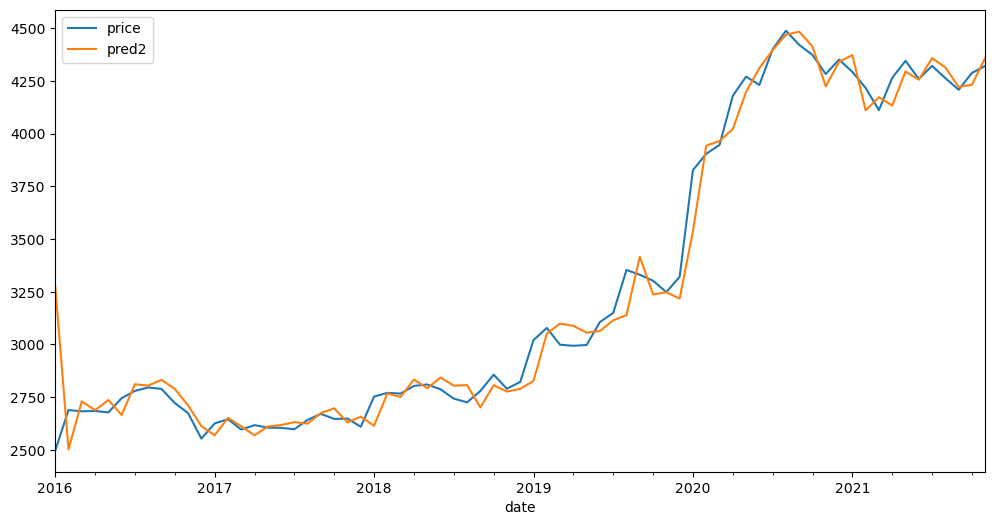

In [117]:
train[['price','pred2']].plot(figsize=(12,6))
plt.show();

In [118]:
import warnings
warnings.filterwarnings("ignore")

##### AutoARIMA to know the best model on the basis of AIC

In [119]:
#!pip install pmdarima
from pmdarima import auto_arima

In [120]:
auto = auto_arima(train['price'], trace = True, supress_warnings = True, seasonal = False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=841.460, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=842.367, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=841.861, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=844.457, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.693 seconds


In [121]:
# P =0, d=1, q =1
model_4 = ARIMA(train['price'], order=(0,1,1))
results_4 = model_4.fit()

In [122]:
pred3 = results_4.predict()
pred3

date
2016-01-31       0.000000
2016-02-29    2501.633761
2016-03-31    2732.488833
2016-04-30    2670.571289
2016-05-31    2687.726774
                 ...     
2021-07-31    4235.452041
2021-08-31    4342.751382
2021-09-30    4243.211306
2021-10-31    4199.444426
2021-11-30    4309.878963
Freq: M, Name: predicted_mean, Length: 71, dtype: float64

In [123]:
rmse4 = np.sqrt(mean_squared_error(train['price'],pred3))
rmse4

311.57226827024124

# SARIMAX

In [124]:
#!pip install skforecast
from skforecast.model_selection_statsmodels import grid_search_sarimax

#### GridSearch CV

In [125]:
param_grid = {'order': [(12, 0, 0), (12, 2, 0), (12, 1, 0), (12, 1, 1), (14, 1, 4)],
             'seasonal_order': [(0, 0, 0, 0)],
             'trend': [None, 'n', 'c']}

results_grid = grid_search_sarimax(
                y = train['price'],
                param_grid = param_grid,
                initial_train_size = 5,
                steps = 7,
                metric = 'mean_absolute_error',
                refit = False,
                verbose = False,
                fit_kwargs = {'maxiter': 200, 'disp': 0}
             )

print(results_grid.to_markdown(tablefmt="github", index=False))

root       INFO  Number of models compared: 15
100%|█████████████████████████████████████████████████████| 15/15 [00:43<00:00,  2.87s/it]

| params                                                               |   metric | order      | seasonal_order   | trend   |
|----------------------------------------------------------------------|----------|------------|------------------|---------|
| {'order': (12, 0, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': None} |  185.946 | (12, 0, 0) | (0, 0, 0, 0)     |         |
| {'order': (12, 0, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': 'n'}  |  185.946 | (12, 0, 0) | (0, 0, 0, 0)     | n       |
| {'order': (14, 1, 4), 'seasonal_order': (0, 0, 0, 0), 'trend': None} |  198.705 | (14, 1, 4) | (0, 0, 0, 0)     |         |
| {'order': (14, 1, 4), 'seasonal_order': (0, 0, 0, 0), 'trend': 'n'}  |  198.705 | (14, 1, 4) | (0, 0, 0, 0)     | n       |
| {'order': (14, 1, 4), 'seasonal_order': (0, 0, 0, 0), 'trend': 'c'}  |  211.621 | (14, 1, 4) | (0, 0, 0, 0)     | c       |
| {'order': (12, 1, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': None} |  284.385 | (12, 1, 0) | (0, 0, 0, 0)     |   

In [126]:
param_grid = {'order': [(1, 0, 0), (1, 1, 0), (1, 1, 1), (2, 1, 1), (2, 1, 0),(2, 1, 2),(2, 2, 2),(2, 0, 2)],
             'seasonal_order': [(0, 0, 0, 0)],
             'trend': [None, 'n', 'c']}

results_grid = grid_search_sarimax(
                y = train['price'],
                param_grid = param_grid,
                initial_train_size = 5,
                steps = 7,
                metric = 'mean_absolute_error',
                refit = False,
                verbose = False,
                fit_kwargs = {'maxiter': 200, 'disp': 0}
             )

print(results_grid.to_markdown(tablefmt="github", index=False))

root       INFO  Number of models compared: 24
100%|█████████████████████████████████████████████████████| 24/24 [00:09<00:00,  2.65it/s]

| params                                                              |   metric | order     | seasonal_order   | trend   |
|---------------------------------------------------------------------|----------|-----------|------------------|---------|
| {'order': (2, 1, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': 'n'}  |  164.577 | (2, 1, 0) | (0, 0, 0, 0)     | n       |
| {'order': (2, 1, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': None} |  164.577 | (2, 1, 0) | (0, 0, 0, 0)     |         |
| {'order': (1, 0, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': None} |  170.238 | (1, 0, 0) | (0, 0, 0, 0)     |         |
| {'order': (1, 0, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': 'n'}  |  170.238 | (1, 0, 0) | (0, 0, 0, 0)     | n       |
| {'order': (1, 1, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': 'c'}  |  170.575 | (1, 1, 0) | (0, 0, 0, 0)     | c       |
| {'order': (1, 1, 1), 'seasonal_order': (0, 0, 0, 0), 'trend': 'n'}  |  171.055 | (1, 1, 1) | (0, 0, 0, 0)     | n       |
| {'orde

In [127]:
# from above gridsearch we observe best order as (2,1,0) 

### SARIMAX with order=(2,1,0,), seasonal_order = (2,1,0,12)

In [128]:
import statsmodels.api as sm

In [129]:
model_max = sm.tsa.statespace.SARIMAX(train['price'], order=(2,1,0,), seasonal_order = (2,1,0,12))
result_max = model_max.fit()

In [130]:
pred_max = result_max.predict()

In [131]:
rmse_max_train = np.sqrt(mean_squared_error(pred_max, train['price']))

In [132]:
rmse_max_train

340.8868358221668

### SARIMAX with seasonal_order = (2,1,0,22)

In [133]:
model_max1 = sm.tsa.statespace.SARIMAX(train['price'], order=(2,1,0,), seasonal_order = (2,1,0,22))
result_max1 = model_max1.fit()

In [134]:
pred_max1 = result_max1.predict()

In [135]:
rmse_max_train1 = np.sqrt(mean_squared_error(pred_max1, train['price']))

#### Training Rmse

In [136]:
rmse_max_train1

348.8136447994174

In [137]:
pred_max1_test = result_max1.forecast(1)
pred_max1_test

2021-12-31    4364.872643
Freq: M, dtype: float64

In [138]:
test

price    4324.406667
Name: 2021-12-31 00:00:00, dtype: float64

In [139]:
rmse_max_test1 = np.sqrt(mean_squared_error(pred_max1_test, test))

###### Testing Rmse

In [140]:
rmse_max_test1

40.46597612716869

# Best Model - Triple Exponential Smoothing 
(with Tend and Seasonality As Additive)

In [141]:
fitted_TESadd12 = ExponentialSmoothing(train['price'],trend='add',seasonal='add',seasonal_periods=12).fit()
train['TESadd12'] = fitted_TESadd12.fittedvalues.shift(-1)

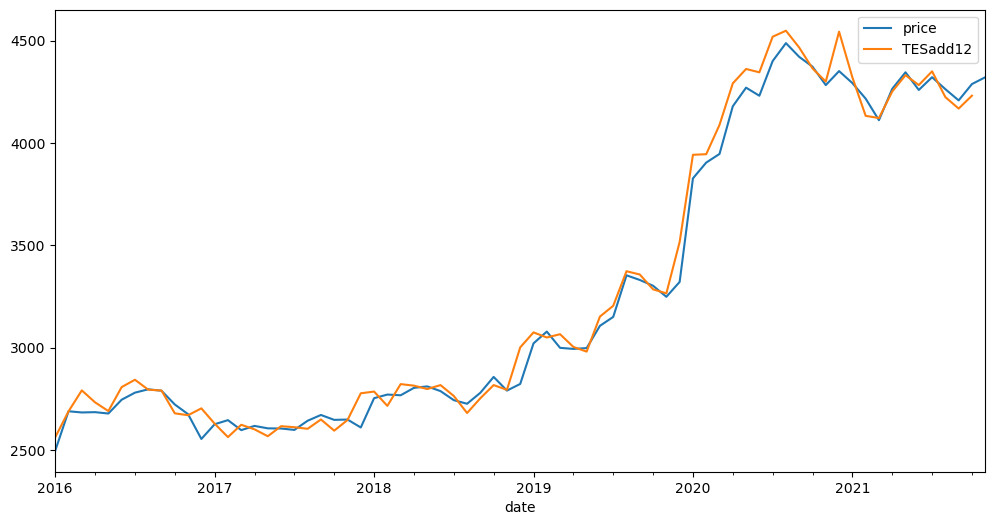

In [142]:
train[['price','TESadd12',]].plot(figsize=(12,6))
plt.show();

#### Forecasting for next 1 month

In [143]:
test_pred3 = fitted_TESadd12.forecast(1)
test_pred3

2021-12-31    4326.560947
Freq: M, dtype: float64

##### RMSE

In [144]:
rmse3 = np.sqrt(mean_squared_error(test_original,test_pred3 ))
rmse3

2.154279974937708

In [145]:
pred3_train = fitted_TESadd12.predict(0)
pred3_train.head()

date
2016-01-31    2522.570769
2016-02-29    2561.548281
2016-03-31    2688.001213
2016-04-30    2790.752304
2016-05-31    2732.217747
Freq: M, dtype: float64

In [146]:
rmse3_train = np.sqrt(mean_squared_error(train_original,pred3_train))
rmse3_train

81.01616988287817

#### Residual Analysis

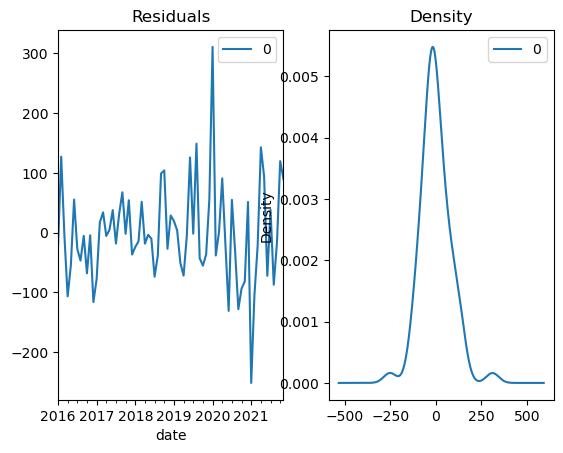

In [147]:
Residuals = pd.DataFrame(fitted_TESadd12.resid)
fig, ax = plt.subplots(1,2)
Residuals.plot(title = 'Residuals',ax = ax[0])
Residuals.plot(kind = 'kde', title = 'Density',ax = ax[1])
plt.show();

#### <font color='green'>Residual Analysis:-</font>
The “residuals” in a time series model are what is left over after fitting a model. For many (but not all) time series models, the residuals are equal to the difference between the observations and the corresponding fitted values: et=yt−^yt.

### Forecasting

In [148]:
forecast = fitted_TESadd12.forecast(4)
forecast

2021-12-31    4326.560947
2022-01-31    4508.371638
2022-02-28    4560.730867
2022-03-31    4529.060652
Freq: M, dtype: float64

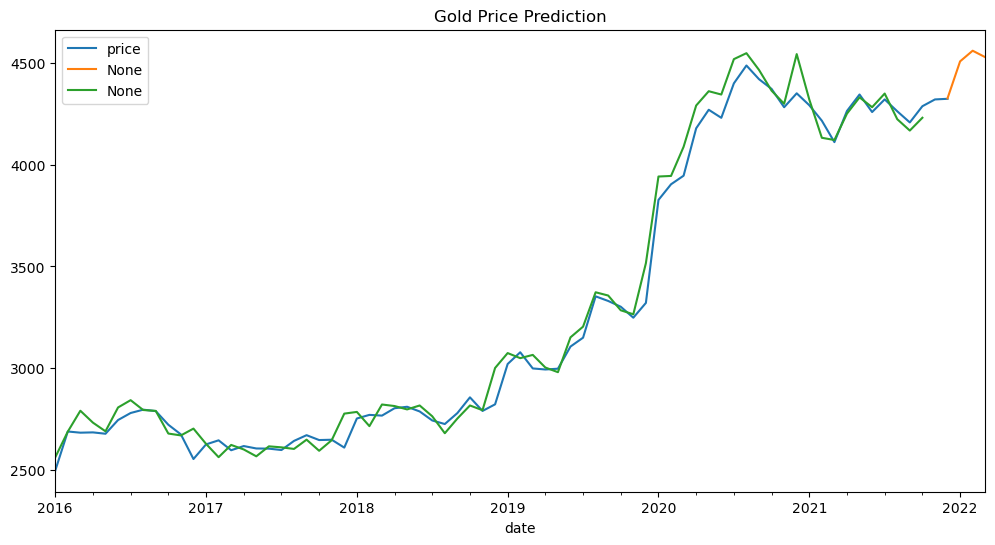

In [149]:
title = 'Gold Price Prediction'
ylabel='Price'
xlabel='Month' 
new.plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True)
pred3_train.shift(-1).plot(legend=True)
plt.show();

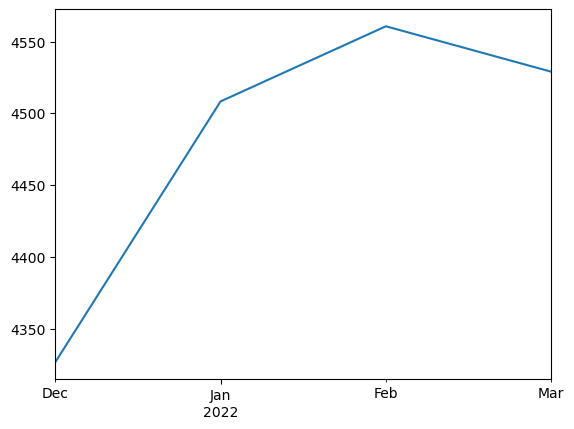

In [150]:
forecast.plot()
plt.show();

In [151]:
from pickle import dump

In [152]:
#dump(fitted_TESadd12, open('model.sav','wb'))